In [3]:
import numpy as np 
import os
import time
import pickle
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn as skl
import seaborn as sns
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error

# Récupération des données

Les données que l'on souhaite récupérer, agréger et visualiser sont à récupérer derrière l'url [Aprifel](http://www.aprifel.com/)

## Récupération de la liste des items proposés. 

Ecrire un bloc de code utilisant beautiful soup pour extraire le nom de l'item

    from bs4 import BeautifulSoup 

et la fonction `pd.read_html` de `pandas` pour construire un dictionnaire `ditems` de listes de dataFrame. Chaque élément de la liste étant le DataFrame associé à chacune des tables présente dans la page html. 

In [4]:
url_prefix="http://www.aprifel.com/fiche-nutri-produit-analyse-poire,"
ditems = {}
for k in range(1,101):
    url = url_prefix + str(k) + '.html'
    # recupération du nom de l'item  (BeautifulSoup) 
    
        # code ici 
        
    # récupération des tables pd.read_html
    
        # code ici

In [5]:
url_prefix="http://www.aprifel.com/fiche-nutri-produit-analyse-poire,"
ditems = {}
for k in range(1,101):
    url = url_prefix + str(k) + '.html'
    htmldoc = urllib.request.urlopen(url) 
    time.sleep(0.1)
# Stocker la page web dans une variable
    soup = BeautifulSoup(htmldoc, "html.parser")
    for title in soup.find_all('title'):
        titre = repr(title).replace('<title>','').replace('</title','').replace('Analyse','')
        titre = titre.replace('nutritionnelle','')
        titre = titre.replace('Aprifel','')
        
    #titre = titre.replace('|','')
    #titre = titre.replace('>','')
        titre = titre[0:-3]
    try:
        ldf = pd.read_html(url)
        ditems[k] = (titre,ldf)
        #print(k,titre)
    except:
        pass 

HTTPError: HTTP Error 403: Forbidden

Sauvegarde des données lues sous forme binaire. Cette étape évite de ré-accéder à la source de données sur le réseau. 

In [ ]:
fd=open('Aliments.pkl','wb')
pickle.dump(ditems,fd)
fd.close()

# Nettoyage des données

Ecrire une fonction `clean` qui accepte en entrée une liste de `DataFrame` associée à un item et retourne un Dataframe nettoyé où chaque entrée est numérique. Utilisez les méthodes de  `df[1].str` pour traiter les colonnes qui sont des chaines de caractères.

## Fonction de nettoyage des DataFrame


    Ecrire une fonction de nettoyage des listes de DataFrame récupérés qui 
    - Construit un index à partir de la colonne de features
    - Supprime les colonnes superflues
    - Gére le cas des données manquantes (par exemple NC)  
    - aggrège les différents Dataframe d'un même item
    - Convertit toutes les quantités en une même unité de masse (en grammes) 
        - Astuce : Créer des colonnes temporaire `df['mug']`  et `df['mg']` pour identifier les lignes asoociées aux diverses unités 
    - Convertit les colonnes en valeurs floattantes ` astype(float)'
 

In [ ]:
fd=open('Aliments.pkl','rb')
ditems = pickle.load(fd)
fd.close()
try:
    del dfb
except:
    pass

for item in ditems.keys():
    name = ditems[item][0].replace(' ','')
    ldf = ditems[item][1]
    try:
        del dfa
    except:
        pass
    for df in ldf:
        if len(df)>1:
            df.index = df.iloc[:,0]
            df = df.drop(df.columns[0],axis=1)
            try:
                dfa = pd.concat((dfa,df),axis=0,sort=True)
            except:
                dfa = df
    dfa = dfa.drop(dfa.columns[0],axis=1)
    # extraction information unités
    dfa['mg']=dfa.iloc[:,0].str.contains('mg')
    dfa['mug']=dfa.iloc[:,0].str.contains('µg')
    # nettoyage de la chaine avant conversion 
    dfa.iloc[:,0] = dfa.iloc[:,0].str.replace('mg','').str.replace('µg','').str.replace('g','')
    # gestion des data manquantes
    dfa['Qté.']=dfa['Qté.'].str.replace('-','0')
    dfa['Qté.']=dfa['Qté.'].str.replace('NC','0')
    dfa['Qté.']=dfa['Qté.'].str.replace('NaN','0')
    # conversion en flottant 
    dfa.iloc[:,0] = dfa.iloc[:,0].astype(float)
    # restitution unites
    # Pour modifier une colonne utiliser loc
    dfa.loc[dfa['mg'],'Qté.']=dfa.loc[dfa['mg'],'Qté.']*1e-3
    dfa.loc[dfa['mug'],'Qté.']=dfa.loc[dfa['mug'],'Qté.']*1e-6
    dfa = dfa.drop(columns=['mug','mg'])
    dfa = dfa.sort_values(by='Qté.',ascending=False)
    dfa = dfa.T
    dfa.index=[name]
    try:
        dfb = pd.concat((dfb,dfa),axis=0,sort=False)
    except:
        dfb = dfa
dfb = dfb.fillna(0)
dfb = dfb.drop(columns='Eau')

On peut extraire les données du dataframe à l'aide de l'attribut values. On constate que la colonne qui contient la teneur en eau masque complètement les autre informations

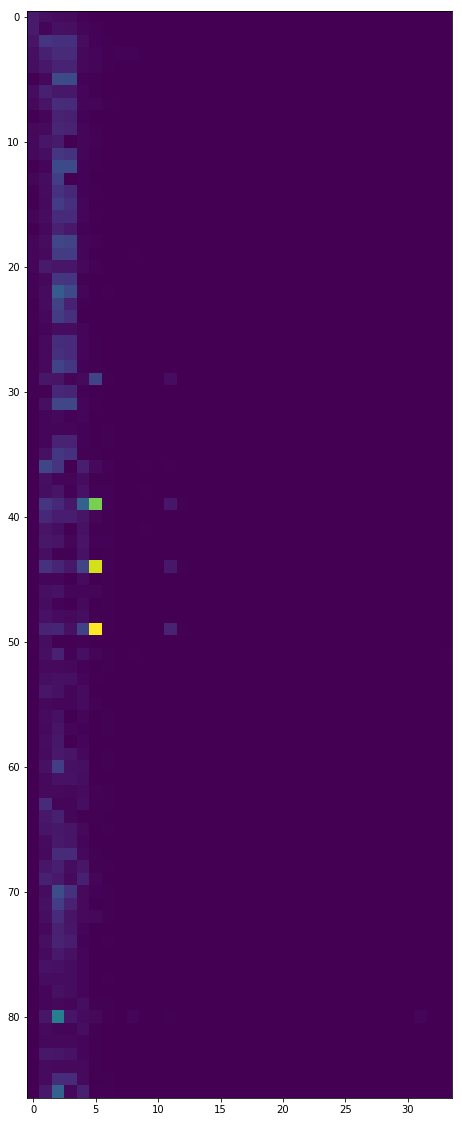

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(dfb.values,interpolation='nearest')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(dfb) 

In [ ]:
dfb.loc[:,:]=scaled_values

In [ ]:
dfb = dfb.sort_values('Vitamine C',ascending=False)

In [ ]:
dfb.columns

Index(['Acides organiques', 'Fibres', 'Glucides', 'Sucre', 'Protéines',
       'Lipides', 'Potassium', 'Flavonoides', 'Polyphénols totaux', 'Calcium',
       'Vitamine C', 'Acides gras saturés', 'Phosphore', 'Magnésium', 'Sodium',
       'Fer', 'Vitamine B5', 'Vitamine E', 'Vitamine B3', 'Zinc', 'Cuivre',
       'Vitamine B6', 'Vitamine B1', 'Provitamine A Béta-carotène',
       'Vitamine B2', 'Manganèse', 'Vitamine B9', 'Equivalent Vitamine A',
       'Iode', 'Lignanes', 'Sélénium', 'Acides phénoliques', 'Stilbènes',
       'Autres polyphénols'],
      dtype='object')

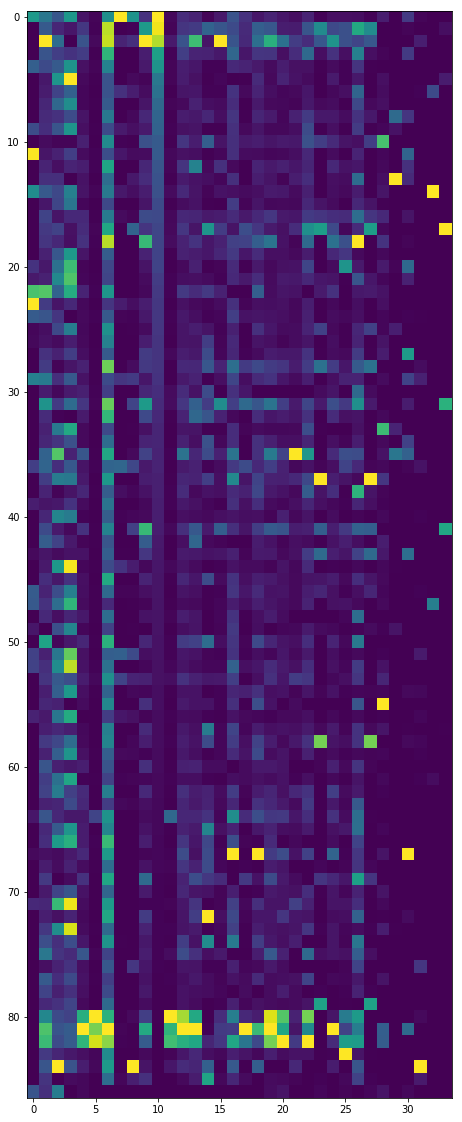

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(dfb.values,interpolation='nearest')

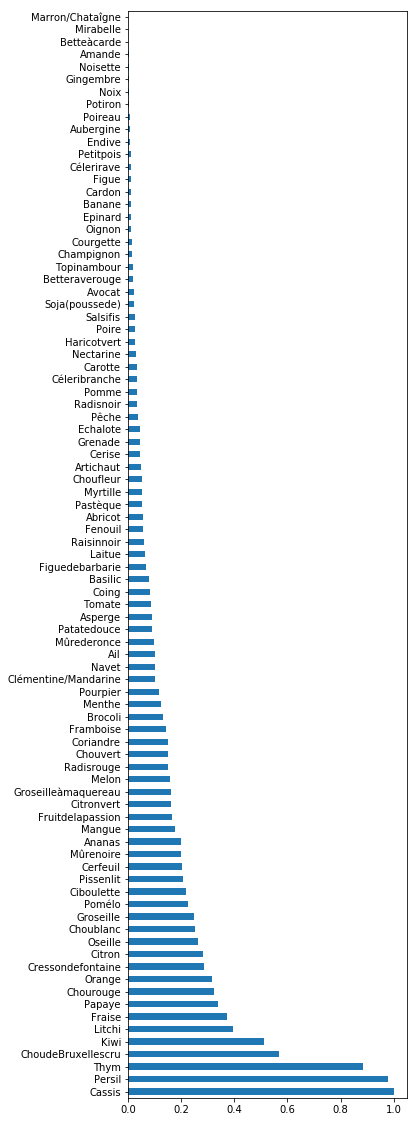

In [ ]:
dfb['Vitamine C'].plot(kind='barh',figsize=(5,20))

# Matrice de corrélation

In [ ]:
dfb

,Acides organiques,Fibres,Glucides,Sucre,Protéines,Lipides,Potassium,Flavonoides,Polyphénols totaux,Calcium,...,Vitamine B2,Manganèse,Vitamine B9,Equivalent Vitamine A,Iode,Lignanes,Sélénium,Acides phénoliques,Stilbènes,Autres polyphénols
Citronvert,4.90,2.80,2.02,1.69,0.66,0.20,0.102,0.04680,0.046800,0.03300,...,0.000020,0.000008,0.000008,5.000000e-06,8.000000e-07,0.000000,0.000000e+00,0.00000,0.00000,0.00000
Citron,4.88,1.20,3.10,2.85,0.84,0.70,0.157,0.03689,0.036910,0.01370,...,0.000025,0.000015,0.000021,5.000000e-07,3.000000e-07,0.000020,2.090000e-06,0.00000,0.00000,0.00000
Fruitdelapassion,3.50,10.40,9.39,9.39,2.30,0.70,0.348,0.00000,0.000020,0.00912,...,0.000130,0.000000,0.000014,1.238000e-04,9.000000e-07,0.000020,0.000000e+00,0.00000,0.00000,0.00000
Cassis,2.63,5.80,8.03,8.03,1.33,0.86,0.330,0.60708,0.621880,0.05710,...,0.000038,0.000280,0.000008,1.667000e-05,1.500000e-06,0.000000,1.100000e-06,0.01480,0.00000,0.00000
Groseille,2.38,4.25,6.64,6.64,1.33,0.95,0.269,0.03858,0.043160,0.03210,...,0.000035,0.000190,0.000017,4.170000e-06,1.100000e-06,0.000000,0.000000e+00,0.00301,0.00157,0.00000
Raisinnoir,0.00,1.40,15.60,15.00,0.60,0.40,0.152,0.08920,0.091230,0.00898,...,0.000010,0.000051,0.000005,4.000000e-06,4.000000e-07,0.000350,0.000000e+00,0.00168,0.00000,0.00000
Framboise,2.12,5.99,4.26,4.26,1.28,0.36,0.151,0.09449,0.207270,0.02500,...,0.000038,0.000670,0.000021,2.000000e-06,5.500000e-07,0.000000,1.300000e-06,0.11278,0.00000,0.00000
Kiwi,1.49,3.50,8.44,7.89,1.20,0.95,0.297,0.00070,0.000700,0.02750,...,0.000025,0.000056,0.000034,8.670000e-06,0.000000e+00,0.000000,0.000000e+00,0.00000,0.00000,0.00000
Pomélo,0.00,1.25,6.34,5.99,0.63,0.20,0.144,0.00000,0.000040,0.02330,...,0.000028,0.000021,0.000024,9.200000e-05,1.000000e-07,0.000000,0.000000e+00,0.00004,0.00000,0.00000
Abricot,1.40,1.80,7.14,6.57,1.01,0.35,0.229,0.00755,0.017590,0.01610,...,0.000040,0.000071,0.000009,1.816600e-04,3.700000e-07,0.000000,0.000000e+00,0.01004,0.00000,0.00000


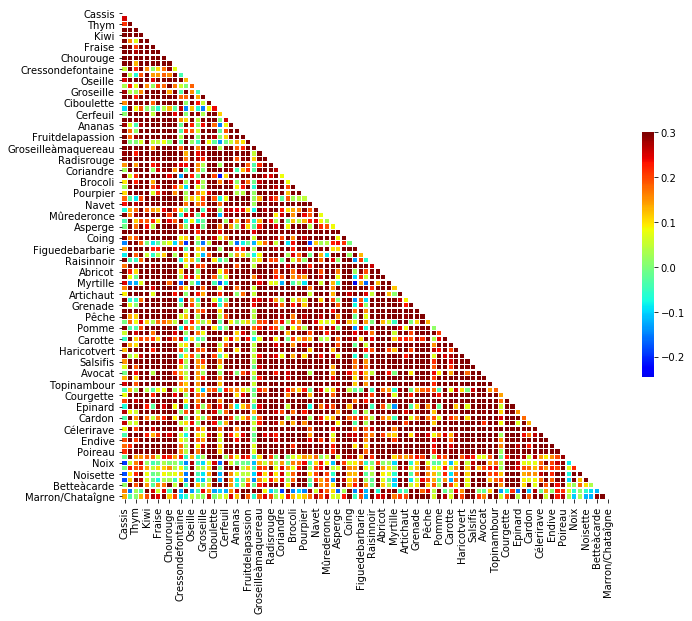

In [ ]:
# Compute the correlation matrix
corr = dfb.T.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='jet', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
dfb['Vitamine C']

Cassis                 1.000000
Persil                 0.977901
Thym                   0.883978
ChoudeBruxellescru     0.569061
Kiwi                   0.512155
Litchi                 0.395028
Fraise                 0.372376
Papaye                 0.339227
Chourouge              0.323204
Orange                 0.314917
Cressondefontaine      0.284530
Citron                 0.281768
Oseille                0.265193
Choublanc              0.253039
Groseille              0.248619
Pomélo                 0.225967
Ciboulette             0.219337
Pissenlit              0.207182
Cerfeuil               0.204420
Mûrenoire              0.201105
Ananas                 0.201105
Mangue                 0.177348
Fruitdelapassion       0.165746
Citronvert             0.160773
Groseilleàmaquereau    0.160221
Melon                  0.159116
Radisrouge             0.151934
Chouvert               0.150829
Coriandre              0.149171
Framboise              0.144751
                         ...   
Céleribr

In [ ]:
pd.read_html('https://fddb.info/db/en/food/natural_product_mirabelle_plum/index.html')

[                  0   1
 0  Select language: NaN,     0   1   2       3
 0 NaN NaN NaN  Search,     0                        1
 0 NaN  Contains a lot of sugar,     0               1
 0 NaN  Write a review,     0             1
 0 NaN  Correct data,     0                      1
 0 NaN  Review Mirabelle Plum,               0   1            2
 0  Add to diary NaN  Select meal,     0             1
 0 NaN  Add to diary,     0            1
 0 NaN  Select meal,                         0   1
 0  When did you eat this? NaN,     0            1
 0 NaN  Add to List,               0   1            2
 0  Add to diary NaN  Select meal,     0             1
 0 NaN  Add to diary,     0            1
 0 NaN  Select meal,                         0   1
 0  When did you eat this? NaN,     0            1
 0 NaN  Add to List,                 0                                                  1
 0  Custom serving  Show serving details:  Standard Show all detai...,     0               1
 0 NaN  Custom serving,  

In [ ]:
dfb.loc['Mirabelle']

Acides organiques              0.259184
Fibres                         0.136531
Glucides                       0.421313
Sucre                          0.000000
Protéines                      0.022542
Lipides                        0.002972
Potassium                      0.000000
Flavonoides                    0.000000
Polyphénols totaux             0.000000
Calcium                        0.000000
Vitamine C                     0.000000
Acides gras saturés            0.000681
Phosphore                      0.000000
Magnésium                      0.000000
Sodium                         0.000000
Fer                            0.000000
Vitamine B5                    0.000000
Vitamine E                     0.000000
Vitamine B3                    0.000000
Zinc                           0.035088
Cuivre                         0.053333
Vitamine B6                    0.000000
Vitamine B1                    0.000000
Provitamine A Béta-carotène    0.019048
Vitamine B2                    0.000000


In [ ]:
name

'Citronvert'

In [ ]:
dfa.T

,Fruitdelapassion
Eau,7.290000e+01
Fibres,1.040000e+01
Glucides,9.390000e+00
Sucre,9.390000e+00
Acides organiques,3.500000e+00
Protéines,2.300000e+00
Lipides,7.000000e-01
Potassium,3.480000e-01
Phosphore,6.860000e-02
Acides gras saturés,5.900000e-02


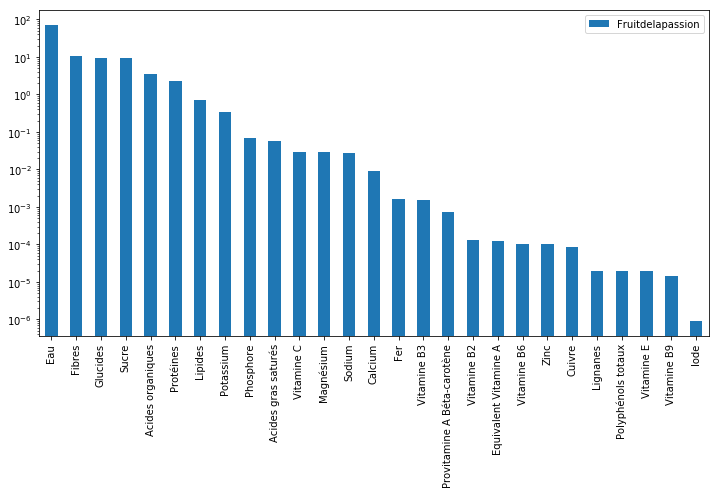

In [ ]:
dfa.T.plot(kind='bar',logy=True, figsize=(12,6))

In [ ]:
def clean(ldf,item_name):
    """
    
    Parameters
    ----------
    
    ldf : list of pandas DataFrame
    item_name : string 
    
    Returns
    -------
    
    df : cleaned DataFrame
        1 row : values in grammes 
        2 Valeur nutritionnelle recommandée déduite
        
    
    """
    
    ldf = [ x for x in ldf if len(x)>1]
    df = pd.concat(tuple(ldf),axis=0)
    df.index=df[0]
    del(df[.0])
    #del(df[2])
    dft = df.T
    
    try:
        del(dft['NaN'])
    except:
        pass
    del(dft['Composants'])
    del(dft['Vitamines'])
    del(dft['Minéraux et oligo-éléments'])
    try:
        del(dft['Polyphenols'])
    except:
        pass
    df = dft.T
    # Garde trace de l'unité
    df['mg']=df[1].str.contains('mg')
    df['mug']=df[1].str.contains('µg')
    # Elimination des chaines de caractères
    df[1] = df[1].str.replace('mg','').str.replace('µg','').str.replace('g','')
    df[1] = df[1].str.replace('NC','0')
    df[2] = df[2].str.replace('NC','0')
    df[2] = df[2].replace(np.nan,'0')
    df[1] = df[1].str.replace('-','0')
    df[2] = df[2].str.replace('-','0')
    df[1] = df[1].astype('float')
    df[2] = df[2].astype('float')
    df.loc[df['mg'],1]=df[df['mg']][1].values*1e-3
    df.loc[df['mug'],1]=df[df['mug']][1].values*1e-6
    del(df['mg'])
    del(df['mug'])
    df[3]=df[1]*100/df[2]
    del df[2]
    dft = df.T
    #dft['Nom']=ditems[item][0]
    #dft['Nom']=item
    return(dft)

In [ ]:
ldf

[                     0        1      2
 0           Composants     Qté.   %VNR
 1                  Eau   64.3 g     NC
 2            Protéines   5.81 g  11.62
 3              Lipides   0.34 g   0.49
 4  Acides gras saturés  0.075 g   0.38
 5             Glucides   21.2 g   8.15
 6                Sucre   1.43 g   1.59
 7               Fibres    4.7 g     NC,
                               0         1       2
 0                     Vitamines      Qté.    %VNR
 1   Provitamine A Béta-carotène      5 µg       -
 2         Equivalent Vitamine A   0.83 µg     0.1
 3                   Vitamine B1    0.2 mg   18.18
 4                   Vitamine B2   0.11 mg    7.86
 5                   Vitamine B3    0.7 mg    4.38
 6                   Vitamine B5    0.6 mg      10
 7                   Vitamine B6   1.99 mg  142.14
 8                   Vitamine B9   51.3 µg   25.65
 9                    Vitamine C   18.1 mg   22.63
 10                   Vitamine E  0.045 mg    0.38,
     0   1
 0 NaN NaN,
   

## Aggrégation des DataFrames pour tous les items

Itérer sur tous les éléments du dictionnaire `ditems` et appliquer votre fonction de nettoyage sur toutes les listes de DataFrame et concaténer tous les DataFrame en un unique DataFrame redgroupant tous les items.
Récupérer les valeurs nutritionnelles recommandées pour construire un nouvel item `Humain`

In [ ]:
for k,item in enumerate(ditems):
    #print(item,ditems[item][0])
    ldf = ditems[item][1]
    dft = clean(ldf,item)
    d0 = pd.DataFrame(dft.iloc[0]).T
    d0.index=[k]
    d1 = pd.DataFrame(dft.iloc[1]).T
    if k>0:
        df0 = pd.concat((df0,d0),axis=0)
        df1 = pd.concat((df1,d1),axis=0)
    else:
        df0 = d0
        df1 = d1 

In [ ]:
df1.columns

Index(['Acides gras saturés', 'Acides organiques', 'Acides phénoliques',
       'Autres polyphénols', 'Calcium', 'Cuivre', 'Eau',
       'Equivalent Vitamine A', 'Fer', 'Fibres', 'Flavonoides', 'Glucides',
       'Iode', 'Lignanes', 'Lipides', 'Magnésium', 'Manganèse', 'Phosphore',
       'Polyphénols totaux', 'Potassium', 'Protéines',
       'Provitamine A Béta-carotène', 'Sodium', 'Stilbènes', 'Sucre',
       'Sélénium', 'Vitamine B1', 'Vitamine B2', 'Vitamine B3', 'Vitamine B5',
       'Vitamine B6', 'Vitamine B9', 'Vitamine C', 'Vitamine E', 'Zinc'],
      dtype='object')

In [ ]:
df1['Vitamine B1']

3    0.001099
3    0.001100
3         NaN
3    0.001101
3    0.001100
3    0.001100
3    0.001100
3    0.001097
3    0.001100
3    0.001099
3    0.001100
3    0.001101
3    0.001100
3         NaN
3    0.001101
3    0.001100
3    0.001100
3    0.001100
3    0.001101
3    0.001102
3    0.001098
3    0.000825
3    0.001101
3    0.001099
3    0.001103
3    0.001099
3    0.001100
3    0.001100
3    0.001100
3    0.001099
       ...   
3    0.001098
3    0.001101
3    0.001100
3    0.001100
3    0.001100
3    0.001099
3    0.001099
3    0.001100
3         NaN
3    0.001099
3    0.001098
3    0.001100
3    0.001100
3    0.001099
3    0.001101
3    0.001101
3    0.001099
3    0.001100
3    0.001099
3    0.001099
3    0.001099
3    0.001111
3    0.001099
3    0.001101
3    0.001100
3    0.011111
3    0.001100
3    0.001099
3    0.001102
3    0.001100
Name: Vitamine B1, Length: 87, dtype: float64

In [ ]:
dff=dff.fillna(0)
dff.index=dff['Nom']
del(dff['Nom'])
dff.to_csv('aliments3.csv')

NameError: name 'dff' is not defined

In [ ]:
dff['Nom']

1      1
1      2
1      3
1      4
1      5
1      6
1      7
1      8
1      9
1     10
1     11
1     12
1     14
1     15
1     16
1     17
1     18
1     19
1     20
1     21
1     22
1     23
1     24
1     25
1     26
1     27
1     28
1     29
1     30
1     31
    ... 
1     63
1     65
1     66
1     67
1     69
1     70
1     72
1     73
1     75
1     76
1     79
1     80
1     81
1     82
1     83
1     84
1     85
1     87
1     88
1     89
1     90
1     91
1     92
1     93
1     94
1     95
1     96
1     97
1     98
1    100
Name: Nom, Length: 87, dtype: int64

![Topinambour](http://www.aprifel.com/imagesUp/fiche/82_m.jpg)


# Analyse des données

# Visualisation des données

Utilisez la fonction pairplot pour visualiser les corrélations 

In [ ]:
(dff.std()/dff.mean()).plot(kind='bar')

NameError: name 'dff' is not defined

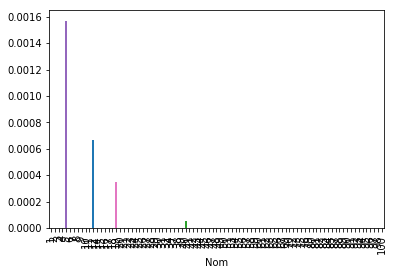

In [ ]:
dff['Stilbènes'].plot(kind='bar')

In [ ]:
dff_n1 = (dff-dff.mean())/dff.std()
dff_n2 = (dff-dff.mean())/(dff.max()-dff.min())

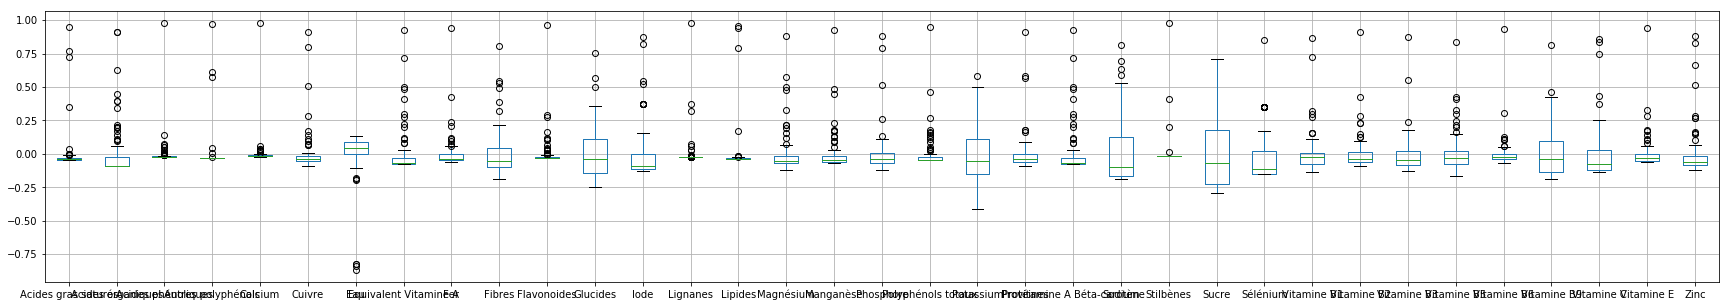

In [ ]:
plt.figure(figsize=(30,5))
dff_n2.boxplot()

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,svd_solver='full',whiten=True)
pca.fit(dff)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=True)

In [ ]:
dff_n1.values.shape

(87, 35)

In [ ]:
A = dff_n1.values-np.mean(dff_n1.values)
U,S,V=np.linalg.svd(A)

<StemContainer object of 3 artists>

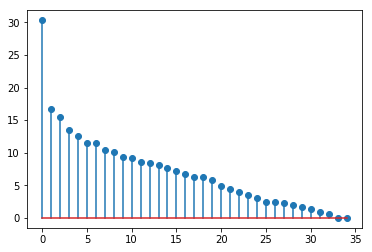

In [ ]:
plt.stem(S)

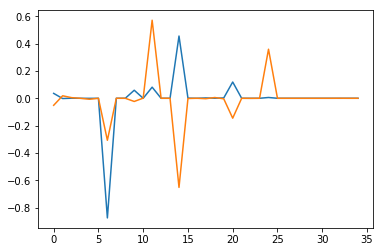

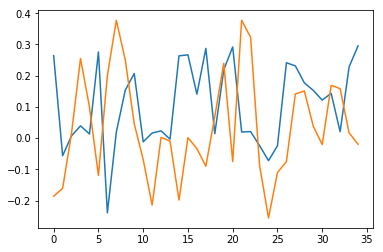

In [ ]:
plt.plot(pca.components_[0,:])
plt.plot(pca.components_[1,:])
plt.figure()
plt.plot(V[0,:])
plt.plot(V[1,:])

In [ ]:
pts = np.dot(dff.values,pca.components_.T)

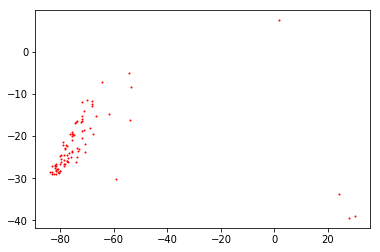

In [ ]:
plt.scatter(pts[:,0],pts[:,1],c='r',s=1)

Un peu de ligne de commande pour récupérer les vignettes au format .jpg  
Utiliser wget dans une boucle for bash 

    for i in `seq 1 100`; 
    do  wget  "http://www.aprifel.com/imagesUp/fiche/"$i"_m.jpg"; 
    done

In [ ]:
dff.iloc[82].index

Index(['Acides gras saturés', 'Acides organiques', 'Acides phénoliques',
       'Autres polyphénols', 'Calcium', 'Cuivre', 'Equivalent Vitamine A',
       'Fer', 'Flavonoides', 'Iode', 'Lignanes', 'Lipides', 'Magnésium',
       'Manganèse', 'Phosphore', 'Polyphénols totaux', 'Potassium',
       'Protéines', 'Provitamine A Béta-carotène', 'Sodium', 'Stilbènes',
       'Sélénium', 'Vitamine B1', 'Vitamine B2', 'Vitamine B3', 'Vitamine B5',
       'Vitamine B6', 'Vitamine B9', 'Vitamine C', 'Vitamine E', 'Zinc'],
      dtype='object')

In [ ]:
dff.values.shape

(87, 31)

In [ ]:
dff.iloc[1]

Acides gras saturés            1.500000e-01
Acides organiques              4.880000e+00
Acides phénoliques             0.000000e+00
Autres polyphénols             0.000000e+00
Calcium                        1.370000e-02
Cuivre                         3.400000e-05
Equivalent Vitamine A          5.000000e-07
Fer                            3.400000e-04
Flavonoides                    3.689000e-02
Iode                           3.000000e-07
Lignanes                       2.000000e-05
Lipides                        7.000000e-01
Magnésium                      8.540000e-03
Manganèse                      1.500000e-05
Phosphore                      1.840000e-02
Polyphénols totaux             3.691000e-02
Potassium                      1.570000e-01
Protéines                      8.400000e-01
Provitamine A Béta-carotène    3.000000e-06
Sodium                         9.900000e-04
Stilbènes                      0.000000e+00
Sélénium                       2.090000e-06
Vitamine B1                    4

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
xmin = np.min(pts[:,0])
xmax = np.max(pts[:,0])
ymin = np.min(pts[:,1])
ymax = np.max(pts[:,1])
fig = plt.figure(figsize=(40,20))
plt.scatter(pts[:,0],pts[:,1],c='r',s=1)
plt.axis('off')
for k1,k in enumerate(dff.index):
    im = Image.open('images/'+str(k)+'_m.jpg')
    height = im.size[1]
# We need a float array between 0-1, rather than
# a uint8 array between 0-255
    im = np.array(im).astype(np.float) / 255
    x = pts[k1-1,0]
    y = pts[k1-1,1]
    #plt.plot(np.arange(10), 4 * np.arange(10))
    # With newer (1.0) versions of matplotlib, you can 
    # use the "zorder" kwarg to make the image overlay
    # the plot, rather than hide behind it... (e.g. zorder=10)
    #fig.figimage(im,pts[82,0], pts[82,1])
    fig.figimage(im,xo=(x-xmin)*2200/(xmax-xmin),yo=(y-ymin)*1050/(ymax-ymin),
                 zorder=0,alpha=0.9)
    plt.annotate(ditems[k][0],xy=(x,y))
    #fig.figimage(im,zorder=10)

    # (Saving with the same dpi as the screen default to
    #  avoid displacing the logo image)
    #fig.savefig('/home/jofer/temp.png', dpi=80)
    #plt.axis('off')
plt.show()

NameError: name 'pts' is not defined

In [ ]:
fig.figimage?

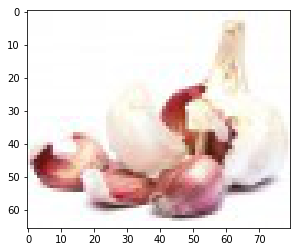

In [ ]:
plt.imshow(im)

## Pandas Quizz

### Détruire une colonne d'un dataframe

In [ ]:
df = pd.DataFrame({'a':[1],'b':[2],'c':[3]})
del(df['a'])
df

,b,c
0,2,3


In [ ]:
df

,b,c
0,2,3


## Cognitive Services

In [ ]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "43feb15147c04a7ab8cb2bd3fe7fa953"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the westcentralus region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

analyze_url = vision_base_url + "analyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/" + \
    "Broadway_and_Times_Square_by_night.jpg/450px-Broadway_and_Times_Square_by_night.jpg"
image_url="http://products.rfsworld.com/userfiles/press_releases/2014/Ultra-broadband-antenna/x-treme.jpg"
image_url="https://proxy.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.onceokltd.com%2Fwp-content%2Fuploads%2F2014%2F05%2F1289133924BTS.jpg&f=1"
image_url="http://krapooarboricole.files.wordpress.com/2009/05/tilleul-du-gommkopf-3.jpg"
#image_url="http://www.aprifel.com/imagesUp/fiche/3_m.jpg"
#image_url="https://webcam.st-malo.com/axis-cgi/mjpg/video.cgi?resolution=704x576&amp;dummy=garb"
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params  = {'visualFeatures': 'Categories,Description,Color'}
data    = {'url': image_url}

response = requests.post(analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)

HTTPError: 401 Client Error: PermissionDenied for url: https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/analyze?visualFeatures=Categories%2CDescription%2CColor

[Video](https://webcam.st-malo.com/axis-cgi/mjpg/video.cgi?resolution=704x576)

In [ ]:
localfile

'./storage/2018-10-11-152256.jpg'

[wget](https://www.labnol.org/software/wget-command-examples/28750/)

# Utilisation de BeautifulSoup

**`BeautifulSoup`** est un module qui permet d'analyser le contenu d'une page html. 
Il s'agit de construire une soupe à partir d'une url. 

    htmldoc = urllib.request.urlopen(url) 
    soup = BeautifulSoup(htmldoc, "html.parser")
    
Ci dessous nous listons la sortie de la commande `dirs` appliquée à un objet et qui en liste les méthodes et attributs. Cette approche est commode pour prendre connaissance de l'API disponible. Les méthodes utilisées sont représentées en gras.

`htmldoc` est un objet de type http.client.HTTPResponse

 'begin',
 'chunk_left',
 'chunked',
 'close',
 'closed',
 'code',
 'debuglevel',
 'detach',
 'fileno',
 'flush',
 'fp',
 'getcode',
 'getheader',
 'getheaders',
 'geturl',
 'headers',
 'info',
 'isatty',
 'isclosed',
 'length',
 'msg',
 'peek',
 'read',
 'read1',
 'readable',
 'readinto',
 'readinto1',
 'readline',
 'readlines',
 'reason',
 'seek',
 'seekable',
 'status',
 'tell',
 'truncate',
 'url',
 'version',
 'will_close',
 'writable',
 'write',
 'writelines'

`soup` est un objet qui possède les membres suivants

 'append',
 **'attrs'**,
 'builder',
 'can_be_empty_element',
 'childGenerator',
 'children',
 'clear',
 'contains_replacement_characters',
 **'contents'**,
 'currentTag',
 'current_data',
 'declared_html_encoding',
 'decode',
 'decode_contents',
 'decompose',
 'descendants',
 'encode',
 'encode_contents',
 'endData',
 'extend',
 'extract',
 'fetchNextSiblings',
 'fetchParents',
 'fetchPrevious',
 'fetchPreviousSiblings',
 'find',
 **'findAll'**,
 'findAllNext',
 'findAllPrevious',
 'findChild',
 'findChildren',
 'findNext',
 'findNextSibling',
 'findNextSiblings',
 'findParent',
 'findParents',
 'findPrevious',
 'findPreviousSibling',
 'findPreviousSiblings',
 **'find_all'**,
 'find_all_next',
 'find_all_previous',
 'find_next',
 'find_next_sibling',
 'find_next_siblings',
 'find_parent',
 'find_parents',
 'find_previous',
 'find_previous_sibling',
 'find_previous_siblings',
 'format_string',
 'get',
 **'getText'**,
 'get_attribute_list',
 **'get_text'**,
 'handle_data',
 'handle_endtag',
 'handle_starttag',
 'has_attr',
 'has_key',
 'hidden',
 'index',
 'insert',
 'insert_after',
 'insert_before',
 'isSelfClosing',
 'is_empty_element',
 'is_xml',
 'known_xml',
 'markup',
 'name',
 'namespace',
 'new_string',
 'new_tag',
 'next',
 'nextGenerator',
 'nextSibling',
 'nextSiblingGenerator',
 'next_element',
 'next_elements',
 'next_sibling',
 'next_siblings',
 'object_was_parsed',
 'original_encoding',
 'parent',
 'parentGenerator',
 'parents',
 'parse_only',
 'parserClass',
 'parser_class',
 'popTag',
 'prefix',
 'preserve_whitespace_tag_stack',
 'preserve_whitespace_tags',
 'prettify',
 'previous',
 'previousGenerator',
 'previousSibling',
 'previousSiblingGenerator',
 'previous_element',
 'previous_elements',
 'previous_sibling',
 'previous_siblings',
 'pushTag',
 'recursiveChildGenerator',
 'renderContents',
 'replaceWith',
 'replaceWithChildren',
 'replace_with',
 'replace_with_children',
 'reset',
 'select',
 'select_one',
 'setup',
 'string',
 'strings',
 'stripped_strings',
 'tagStack',
 'text',
 'unwrap',
 'wrap'

## Exemple : Web Scraping du site fddb.info 

## Récupération de la liste des URL 

In [ ]:
url = 'https://fddb.info/db/en/producers/natural_product/index.html'
htmldoc = urllib.request.urlopen(url) 
soup = BeautifulSoup(htmldoc, "html.parser")

In [ ]:
import re

In [ ]:
lurl = []
for a in soup.find_all('a', href=True):
    s=repr(a)
    if 'natural_product_' in s:
        s=s.replace('<a href="','')
        s=re.sub('".*','',s)
        lurl.append(s)

+ `attrs` est la liste des attributs
+ `contents` contenu de la balise
+ `getText` récupère le texte entre les balises

In [ ]:
url = lurl[4]
htmldoc = urllib.request.urlopen(url) 
soup = BeautifulSoup(htmldoc, "html.parser")

Dans le site `fddb.info` on identifie que l'information intéressante est présente à l'intérieur d'un balise <div> dont l'attribut style est `background-color:#f0f5f9;padding:2px 4px;`

## Récupération du nom de l'item

On construit une fonction spécialisée pour extraire la chaine de caracère qui suit la chaine `natural_product` pour récupérer le nom de l'item récupéré.

In [ ]:
import re
def getname(url):
    name = re.search('.*natural_product_(.*)\/.*',url)[1]
    return name

In [ ]:
getname(lurl[42])

'mushrooms_white_fresh'

In [ ]:
mydivs1 = soup.find_all('div',style='background-color:#f0f5f9;padding:2px 4px;')
mydivs2 = soup.find_all('div',style='padding:2px 4px;')
mydivs = mydivs1+mydivs2

In [ ]:

for url in lurl:
    name = getname(url)
    htmldoc = urllib.request.urlopen(url) 
    soup = BeautifulSoup(htmldoc, "html.parser")
    mydivs1 = soup.find_all('div',style='background-color:#f0f5f9;padding:2px 4px;')
    mydivs2 = soup.find_all('div',style='padding:2px 4px;')
    mydivs = mydivs1+mydivs2
    di = {}
    for div in mydivs:
        lc = [ c for c in div.children]
        di[lc[0].getText()]= [lc[1].getText().replace('kJ','').replace('%','')]
    df = pd.DataFrame(di)
    df.index=[name]
    try:
        dfc = pd.concat((dfc,df),axis=0,sort=False)
    except:
        dfc = df

/home/uguen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [ ]:
dfc.sort_values

,Caffeine,Calcium,Calories,Calorific value,Carbohydrates,Chlorine,Cholesterol,Copper,Dietary fibre,Fat,...,Sulphur,Thiamine,Vitamin B12,Vitamin B6,Vitamin C,Vitamin D,Vitamin E,Water content,Zinc,thereof Sugar
banana_fresh,NaN,7 mg,93 kcal,388,20 g,109 mg,0 mg,0.1 mg,2 g,0.2 g,...,13 mg,0.04 mg,0 mg,0.36 mg,11 mg,0 mg,0.27 mg,75,0.2 mg,17 g
banana_fresh,NaN,7 mg,93 kcal,388,20 g,109 mg,0 mg,0.1 mg,2 g,0.2 g,...,13 mg,0.04 mg,0 mg,0.36 mg,11 mg,0 mg,0.27 mg,75,0.2 mg,17 g
tomato_fresh,NaN,9 mg,18 kcal,75,2.6 g,30 mg,0 mg,0.1 mg,1.3 g,0.2 g,...,11 mg,0.06 mg,0 mg,0.1 mg,19 mg,0 mg,0.8 mg,94,0.1 mg,2.5 g
tomato_fresh,NaN,9 mg,18 kcal,75,2.6 g,30 mg,0 mg,0.1 mg,1.3 g,0.2 g,...,11 mg,0.06 mg,0 mg,0.1 mg,19 mg,0 mg,0.8 mg,94,0.1 mg,2.5 g
hens_egg,NaN,51 mg,137 kcal,572,1.5 g,180 mg,396 mg,0.1 mg,0 g,9.3 g,...,180 mg,0.1 mg,1.9 μg,0.08 mg,0 mg,2.93 μg,1.96 mg,76,1.5 mg,1.5 g
hens_egg,NaN,51 mg,137 kcal,572,1.5 g,180 mg,396 mg,0.1 mg,0 g,9.3 g,...,180 mg,0.1 mg,1.9 μg,0.08 mg,0 mg,2.93 μg,1.96 mg,76,1.5 mg,1.5 g
apple_fresh,NaN,5.3 mg,54 kcal,226,14.4 g,2.2 mg,NaN,0.1 mg,2 g,0.1 g,...,6 mg,0.04 mg,0 mg,0.1 mg,12 mg,0 mg,0.49 mg,83,0.1 mg,10.3 g
blueberry,NaN,NaN,57 kcal,239,14.5 g,NaN,NaN,NaN,2.4 g,0.3 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10 g
satsuma_fresh,NaN,4 mg,46 kcal,193,9.4 g,2 mg,0 mg,0 mg,0.7 g,0 g,...,5 mg,0.03 mg,0 mg,0.04 mg,61 mg,0 mg,0.27 mg,86,0.1 mg,9.4 g
apple_freshly_cooked,NaN,8 mg,54 kcal,228,12 g,2 mg,NaN,0.1 mg,2.1 g,0.4 g,...,7 mg,0.02 mg,NaN,0.04 mg,7 mg,NaN,0.54 mg,84,0.1 mg,NaN


### Sauvegarde temporaire des données récupérées

In [ ]:
fd=open('Aliments2.pkl','wb')
pickle.dump(dfc,fd)
fd.close()

In [ ]:
!ls -l Aliments2.pkl

-rw-r--r-- 1 uguen uguen 48835 oct.  27 15:14 Aliments2.pkl


In [ ]:
del dfc

In [ ]:
fd=open('Aliments2.pkl','rb')
dfc = pickle.load(fd)
fd.close()

In [ ]:
dfc = dfc.fillna(0)

In [ ]:
dfc['Calories']=dfc['Calories'].str.replace('kcal','')

In [ ]:
dfc['Calories']=dfc['Calories'].astype(float)

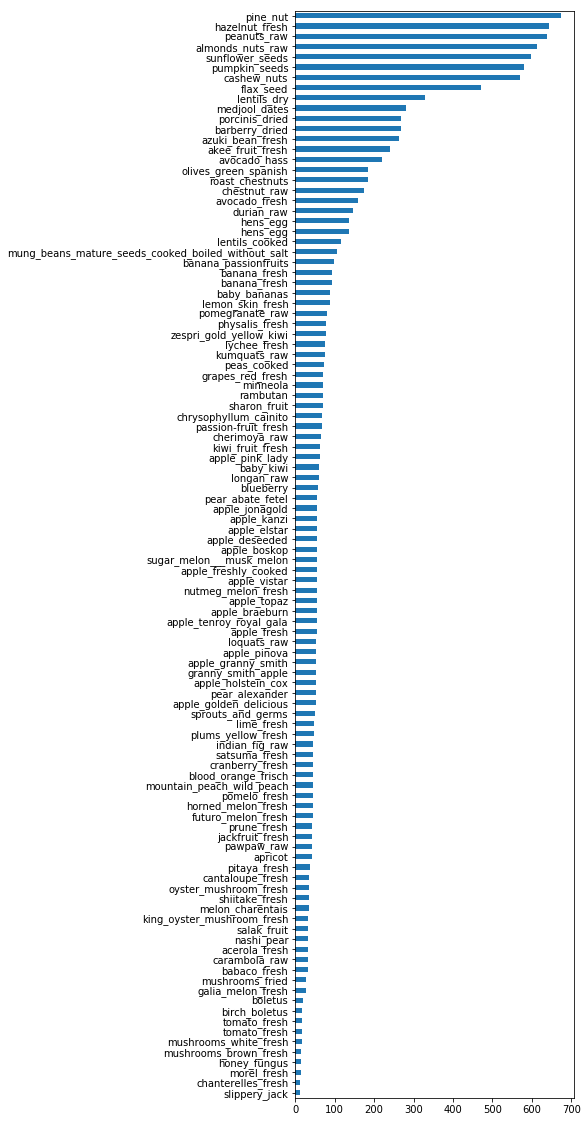

In [ ]:
dfc['Calories'].sort_values().plot(kind='barh',figsize=(5,20))

In [ ]:
dfc['Calcium'] = dfc['Calcium'].str.replace('mg','').astype(float).apply(lambda x: x*1e-3).fillna(0)

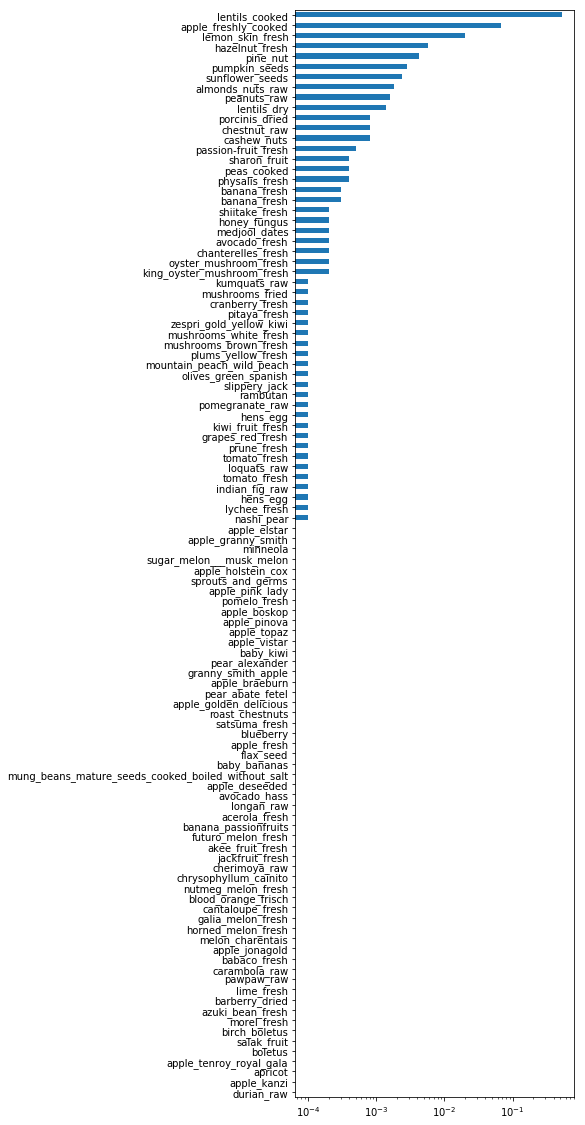

In [ ]:
#feature='Cholesterol'
#feature='Copper'
#feature='Dietary fibre'
#feature='Fat'
#feature='Iron'
#feature='Magnesium'
feature='Manganese'
dfc[feature].sort_values().plot(kind='barh',figsize=(5,20),logx=True)

In [ ]:
## Netoyage des données

In [ ]:
dfc['Caffeine']=dfc['Caffeine'].str.replace('mg','').astype(float).apply(lambda x: x*1e-3).fillna(0)

In [ ]:
#dfc['Caffeine'].sort_values().plot(kind='barh',figsize=(5,20))

In [ ]:
dfc['Carbohydrates']=dfc['Carbohydrates'].str.replace('g','').astype(float).fillna(0)

In [ ]:
dfc['Chlorine']=dfc['Chlorine'].str.replace('mg','').astype(float).apply(lambda x: x*1e-3).fillna(0)

In [ ]:
dfc['Cholesterol']=dfc['Cholesterol'].str.replace('mg','').astype(float).apply(lambda x: x*1e-3).fillna(0)

In [ ]:
dfc['Copper']=dfc['Copper'].str.replace('mg','').astype(float).apply(lambda x: x*1e-3).fillna(0)

In [ ]:
dfc['Dietary fibre']=dfc['Dietary fibre'].str.replace('g','').astype(float).fillna(0)

In [ ]:
dfc['Fat']=dfc['Fat'].str.replace('g','').astype(float).fillna(0)

In [ ]:
dfc['Magnesium']=dfc['Magnesium'].str.replace('mg','').astype(float).apply(lambda x: x*1e-3).fillna(0)

In [ ]:
dfc.columns

Index(['Caffeine', 'Calcium', 'Calories', 'Calorific value', 'Carbohydrates',
       'Chlorine', 'Cholesterol', 'Copper', 'Dietary fibre', 'Fat', 'Fluorine',
       'Iodine', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium',
       'Protein', 'Retinol', 'Riboflavin', 'Salt', 'Sulphur', 'Thiamine',
       'Vitamin B12', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E',
       'Water content', 'Zinc', 'thereof Sugar'],
      dtype='object')

In [ ]:
dfc['Manganese']=dfc['Manganese'].str.replace('mg','').astype(float).apply(lambda x: x*1e-3).fillna(0)

In [ ]:
dfc['Manganese']

banana_fresh                                          0.0003
banana_fresh                                          0.0003
tomato_fresh                                          0.0001
tomato_fresh                                          0.0001
hens_egg                                              0.0001
hens_egg                                              0.0001
apple_fresh                                           0.0000
blueberry                                             0.0000
satsuma_fresh                                         0.0000
apple_freshly_cooked                                  0.0680
apple_golden_delicious                                0.0000
pear_abate_fetel                                      0.0000
apple_braeburn                                        0.0000
olives_green_spanish                                  0.0001
mountain_peach_wild_peach                             0.0001
plums_yellow_fresh                                    0.0001
granny_smith_apple      

# Analyse du site du Figaro

In [ ]:
dfabricot = pd.read_html("http://sante.lefigaro.fr/mieux-etre/nutrition-aliments/abricot/composition")

In [ ]:
dfabricot

[                                                    0       1               2
 0                                Nom des constituants  UnitÃ©  Teneur moyenne
 1                                             Energie    kcal             459
 2                                                 Eau       g             866
 3                                          ProtÃ©ines       g              14
 4                                            Glucides       g              92
 5                                              Sucres       g              92
 6                                              Amidon       g               0
 7                                 Fibres alimentaires       g               2
 8                                             Lipides       g             039
 9                                         AG saturÃ©s       g             002
 10                                  AG monoinsaturÃ©s       g             017
 11                                  AG polyinsaturÃ